# Classifying Text

- Checkin on Reddit Posts
- Codealong on text classification using `20_newsgroups`
- Independent work on reddit classification

In [1]:
#load in the newsgroups dataset
from sklearn.datasets import fetch_20newsgroups

In [5]:
#download and fetch newsgroup data
#here I limit this to two groups -- auto and motorcycles
news = fetch_20newsgroups(categories = ['rec.autos', 'rec.motorcycles'])

In [6]:
#the first news article
news.data[0]

'From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)\nSubject: Re: WARNING.....(please read)...\nKeywords: BRICK, TRUCK, DANGER\nNntp-Posting-Host: zimmer.csufresno.edu\nOrganization: CSU Fresno\nLines: 33\n\nIn article <1qh336INNfl5@CS.UTK.EDU> larose@austin.cs.utk.edu (Brian LaRose) writes:\n>This just a warning to EVERYBODY on the net.  Watch out for\n>folks standing NEXT to the road or on overpasses.   They can\n>cause SERIOUS HARM to you and your car.  \n>\n>(just a cliff-notes version of my story follows)\n>\n>10pm last night, I was travelling on the interstate here in\n>knoxville,  I was taking an offramp exit to another interstate\n>and my wife suddenly screamed and something LARGE hit the side\n>of my truck.  We slowed down, but after looking back to see the\n>vandals standing there, we drove on to the police station.\n>\n>She did get a good look at the guy and saw him "cock his arm" with\n>something the size of a cinderblock, BUT I never saw him. We are \n>VERY lucky the truck sits

In [8]:
#labels of data are 0 for auto and 1 for motorcycle
news.target[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [69]:
print(news.data[1])

From: cjackson@adobe.com (Curtis Jackson)
Subject: Tracing license plates of BDI cagers?
Article-I.D.: adobe.1993Apr6.184204.26184
Organization: Adobe Systems Incorporated, Mountain View
Lines: 24

This morning a truck that had been within my sight (and I within
his) for about 3 miles suddenly forgot that I existed and pulled
over right on me -- my front wheel was about even with the back
edge of his front passenger door as I was accelerating past him.

It was trivial enough for me to tap the brakes and slide behind him
as he slewed over (with no signal, of course) on top of me, with
my little horn blaring (damn, I need Fiamms!), but the satisfaction
of being aware of my surroundings and thus surviving was not enough,
especially when I later pulled up alongside the bastard and he made
no apologetic wave or anything.

Is there some way that I can memorize the license plate of an
offending vehicle and get the name and address of the owner?
I'm not going to firebomb houses or anything, I'

### CountVectorizer

We will use the `CountVectorizer` to import our data and turn it into numerical features for our model.  

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#create a countvectorizer with ngram_range = (1, 3)

cvect = CountVectorizer(ngram_range=(1,3))


a = 'Jacob is tired and wants nachos. I would prefer veggie nachos.'
b = 'Erika does not eat nachos usually. Tino is into them.'

X = cvect.fit_transform([a, b])

cvect.get_feature_names()

import numpy as np
import pandas as pd
pd.DataFrame(X.toarray(), columns = cvect.get_feature_names()).T.head()

,0,1
and,1,0
and wants,1,0
and wants nachos,1,0
does,0,1
does not,0,1


In [71]:
#create variables for our datasets
X = news.data
y = news.target

In [43]:
# We need a model
from sklearn.linear_model import LogisticRegression

In [44]:
# instantiate the Logistic Regressor model and CountVectorizer
cvect = CountVectorizer()
lgr = LogisticRegression()

In [45]:
# Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
len(X_train), len(X_test)

(894, 298)

In [50]:
# We need to train
X_vect_train = cvect.fit_transform(X_train)
X_vect_test = cvect.transform(X_test)

In [51]:
lgr.fit(X_vect_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# We need to evaluate
lgr.score(X_vect_test, y_test)

0.9429530201342282

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
lgr.coef_

array([[ 7.28213033e-02, -7.70455190e-02,  7.87672240e-03, ...,
         4.22154482e-03,  2.95518736e-03, -2.30833478e-06]])

In [56]:
#a DataFrame containing the important words
important_words = pd.DataFrame({'word': cvect.get_feature_names(), 'coef': lgr.coef_[0]})

In [57]:
important_words.head()

,word,coef
0,00,0.072821
1,000,-0.077046
2,0000,0.007877
3,0000000004,0.020265
4,0000000005,0.049283


In [62]:
#largest importance
large = important_words.nlargest(5, 'coef')

In [72]:
#smallest importance
small = important_words.nsmallest(5, 'coef')

In [64]:
#put together as frame
plot_frame = pd.concat([large, small])
plot_frame.iloc[:5]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

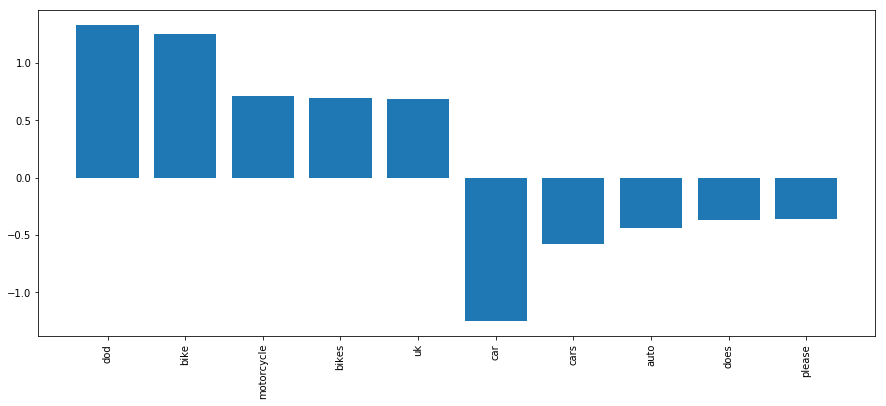

In [67]:
plt.figure(figsize = (15, 6))
plt.bar(plot_frame['word'], plot_frame['coef'])
plt.xticks(rotation = 90)

### Getting Reddit Posts

In [228]:
import praw

reddit = praw.Reddit(client_id='',
                     client_secret='',
                     user_agent='stever')

import pandas as pd
authors = []
titles = []
comments = []
for submission in reddit.subreddit('math').hot(limit=1000):
    authors.append(submission.author)
    titles.append(submission.title)
    comments.append(submission.comments)

In [229]:
df2 = pd.DataFrame({'author': authors, 'title': titles, 'comments': comments})

In [230]:
df2.head()

,author,title,comments
0,AutoModerator,"Simple Questions - April 05, 2019","(ek6psp6, ek7h184, ek7mxfw, ek7z3k7, ek7yrpe, ..."
1,AutoModerator,Career and Education Questions,"(ek424bs, ek7tqs9, ek5xita, ek699pn, ek8rm1y, ..."
2,mathstrolls,what is the best advice you received from a ma...,"(ek8u3qc, ek90xfl, ek8vrzq, ek8zs6k, ek8ugj4, ..."
3,flexibeast,"Chalkdust magazine: ""The scutoid: a geometric ...","(ek8nk3f, ek923w3)"
4,blagaga104,applied mathematics- biology,"(ek99l36, ek97opy, ek9cqji, ek98wml, ek9jy05, ..."


In [231]:
df2['reddit'] = 'math'

In [232]:
df['reddit'] = 'tacobell'

In [233]:
df2.head()

,author,title,comments,reddit
0,AutoModerator,"Simple Questions - April 05, 2019","(ek6psp6, ek7h184, ek7mxfw, ek7z3k7, ek7yrpe, ...",math
1,AutoModerator,Career and Education Questions,"(ek424bs, ek7tqs9, ek5xita, ek699pn, ek8rm1y, ...",math
2,mathstrolls,what is the best advice you received from a ma...,"(ek8u3qc, ek90xfl, ek8vrzq, ek8zs6k, ek8ugj4, ...",math
3,flexibeast,"Chalkdust magazine: ""The scutoid: a geometric ...","(ek8nk3f, ek923w3)",math
4,blagaga104,applied mathematics- biology,"(ek99l36, ek97opy, ek9cqji, ek98wml, ek9jy05, ...",math


In [234]:
combined = pd.concat([df, df2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [235]:
combined

,author,comments,lemmed_titles,reddit,title
0,tacobellblake,NaN,E4 Megathread ( 2019 ),tacobell,E4 Megathread (2019)
1,Ivypearl,NaN,I am pet sitting for a family that owns 37 Ta...,tacobell,I am pet sitting for a family that owns 37 Tac...
2,tacobellblake,NaN,"I will never forget you , Meximelt",tacobell,"I will never forget you, Meximelt"
3,ArnoldSchwarzeneggir,NaN,Homemade Quesaritoooos,tacobell,Homemade Quesaritoooos
4,bottleonalamp,NaN,"My location not only had the new taco , but t...",tacobell,"My location not only had the new taco, but thi..."
5,benjaminikuta,NaN,Did you know you could get your Cinnamon Twis...,tacobell,Did you know you could get your Cinnamon Twist...
6,nicky3123,NaN,Got some taco bell for me and my mom while sh...,tacobell,Got some taco bell for me and my mom while she...
7,ktg_unit,NaN,Check THIS out . This mini skillet bowl ain ’...,tacobell,Check THIS out. This mini skillet bowl ain’t s...
8,DaddyMayIPun,NaN,Pretty sure the New Haven Cantina is better t...,tacobell,Pretty sure the New Haven Cantina is better th...
9,Magnumxl711,NaN,Thought the new Loaded Nacho Taco LTO looked ...,tacobell,Thought the new Loaded Nacho Taco LTO looked a...


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [185]:
cvect = CountVectorizer(ngram_range=(1, 3))
X = cvect.fit_transform(combined.lemmed_titles)

In [186]:
y = combined.reddit

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
clf = LogisticRegression()

In [189]:
clf.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [190]:
features = cvect.get_feature_names()

In [191]:
coefs = clf.coef_

In [192]:
coefs[0]

array([ 1.09555504e-01, -1.36578962e-05, -1.36578962e-05, ...,
       -4.62333725e-02, -4.62333725e-02,  2.65399271e-01])

In [193]:
importances = pd.DataFrame({'word': features, 'coef': coefs[0]})

In [194]:
%matplotlib inline
importances = pd.DataFrame({'word': features, 'coef': coefs[0]})
top_10 = importances.nlargest(20, 'coef')['word']
bot_10 = importances.nsmallest(20, 'coef')['word']

In [195]:
v2 = CountVectorizer(stop_words='english', max_features=50)

In [196]:
X = v2.fit_transform(combined.lemmed_titles)

In [197]:
clf.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
clf.score(X, y)

0.7823303457106274

In [199]:
v2.get_feature_names()

['app',
 'baja',
 'bell',
 'best',
 'blast',
 'breakfast',
 'burrito',
 'cantina',
 'cheese',
 'cheesy',
 'chicken',
 'crunchwrap',
 'day',
 'did',
 'doe',
 'does',
 'favorite',
 'fry',
 'good',
 'got',
 'item',
 'just',
 'know',
 'like',
 'local',
 'make',
 'math',
 'mathematician',
 'mathematics',
 'menu',
 'nacho',
 'new',
 'number',
 'order',
 'problem',
 'proof',
 'rattlesnake',
 'really',
 'sauce',
 'taco',
 'tb',
 'thing',
 'time',
 'today',
 've',
 'wa',
 'way',
 'work',
 'working',
 'year']

In [200]:
a = set(['taco'])
b = set([i for i in top_20.values] + [])

NameError: name 'top_20' is not defined

In [201]:
a.intersection(b)

{'taco'}

In [202]:
b

{'app',
 'bell',
 'burrito',
 'item',
 'my',
 'nacho',
 'sauce',
 'taco',
 'these',
 'this'}

In [203]:
import numpy as np
np.e**(-2.85)

0.05784432087483846

In [215]:
math = importances.nsmallest(10, 'coef')

In [216]:
taco = importances.nlargest(10, 'coef')

In [223]:
mt = pd.concat([math, taco])
mt['color'] = mt.coef.apply(lambda x: 'red' if x > 0 else 'grey')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

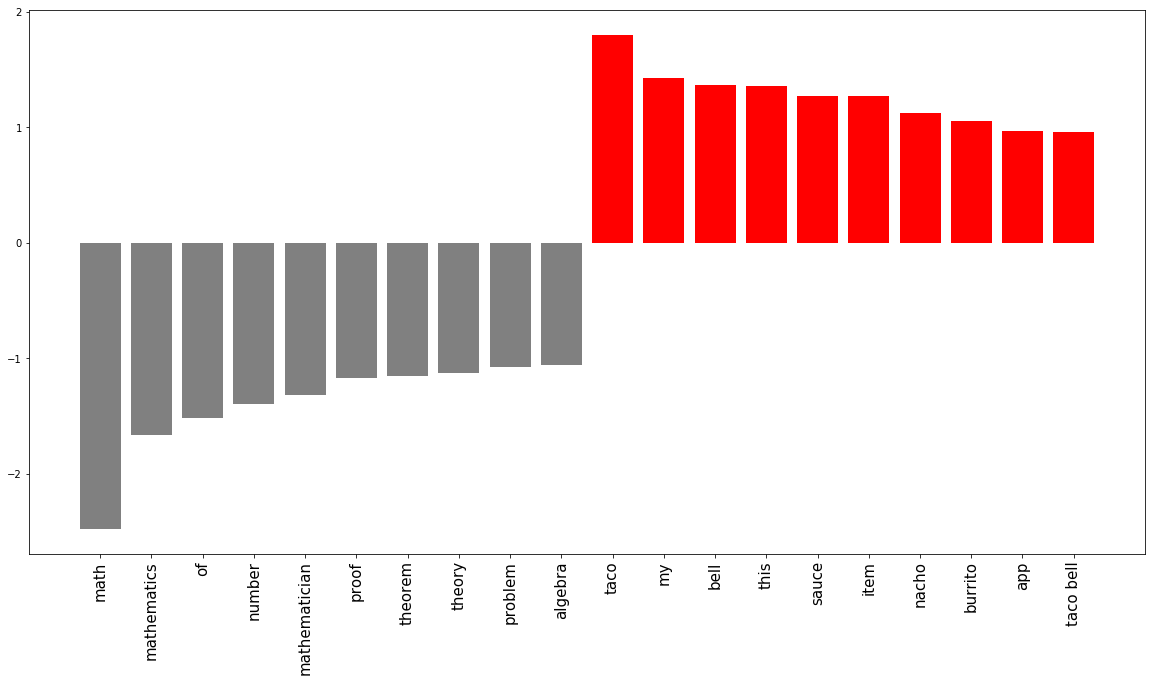

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
plt.bar(mt.word, mt.coef, color = mt.color)
plt.xticks(rotation = 90, fontsize = 15)

In [206]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [213]:
def select_verts(a, b, c, n):
    ans = []
    for i in range(a+1):
        for j in range(b+1):
            for k in range(c+1):
                if sum([i, j, k]) != n:
                    ans.append([i, j, k])
    return ans

ans       

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1]]

In [214]:
select_verts(2, 2, 2, 4)

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 2],
 [0, 2, 0],
 [0, 2, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 1],
 [1, 2, 0],
 [1, 2, 2],
 [2, 0, 0],
 [2, 0, 1],
 [2, 1, 0],
 [2, 1, 2],
 [2, 2, 1],
 [2, 2, 2]]

In [148]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [149]:
def lem_title(title):
    wnl = WordNetLemmatizer()
    stm = SnowballStemmer("english")
    toke_test = word_tokenize(title)
    lem_tokes = []
    for toke in toke_test:
        lem_tokes.append(stm.stem(wnl.lemmatize(toke)))
    comb = ''
    for lemmed in lem_tokes:
        comb += ' ' + lemmed
    return comb

In [150]:
test = lem_title(df2.title[3])

In [151]:
for word in test:
    if word.startswith('math'):
        test[test.index(word)].insert('math')

In [152]:
test

' what is the best advic you receiv from a mathematician ?'

In [153]:
df2['lemmed_titles'] = df2.title.apply(lem_title)

In [154]:
df2.head()

,author,title,reddit,lemmed_titles
0,AutoModerator,"Simple Questions - April 05, 2019",math,"simpl question - april 05 , 2019"
1,AutoModerator,Career and Education Questions,math,career and educ question
2,flexibeast,"Chalkdust magazine: ""The scutoid: a geometric ...",math,chalkdust magazin : `` the scutoid : a geomet...
3,mathstrolls,what is the best advice you received from a ma...,math,what is the best advic you receiv from a math...
4,randomtechguy142857,What are some mathematical statements that see...,math,what are some mathemat statement that seem co...


In [155]:
df2.title.apply(lambda x: wnl.lemmatize(x))

0                      Simple Questions - April 05, 2019
1                         Career and Education Questions
2      Chalkdust magazine: "The scutoid: a geometric ...
3      what is the best advice you received from a ma...
4      What are some mathematical statements that see...
5               What are some interesting math podcasts?
6             Riemannian Geometry and Algebraic Geometry
7                           applied mathematics- biology
8      How can I practice or master math post-undergrad?
9        Max Tegmark: On the dimensionality of spacetime
10      Proving Optimality for the 100 Prisoners Problem
11            Questions about prime numbers in modulo 12
12              Challenge: Rational Absolite Convergence
13                     How do i get research experience?
14      Math Puzzle - Looking for validation of my math.
15                      What is “mathematical maturity?”
16                                 Getting more rigorous
17     What would it mean for m